In [ ]:
# tweets=api.user_timeline(screen_name='RealDonaldTrump', count=20)
#print(tweets)

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re

In [62]:
ACCESS_TOKEN="1114257900657106945-1dCAiAhqC8Dn7N0SYchfrcPBJNnO3R"
ACCESS_TOKEN_SECRET="9q6svuksiWxwxYggI5hVWgY8ZLrXESSMUAnGYNkEp97By"
CONSUMER_SECRET="g4CkmDKmbv2jNxm2yQOmth8NWOthgCgDSZGP1vBRuP5v4g6ZhD"
CONSUMER_KEY="eOqXos4xUTFpuv0uxPYCvRIpH"

In [63]:
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) # Authorization to consumer key and consumer secret
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET) # Access to user's access key and access secret 
    api = tweepy.API(auth)  # Return API with authentication:
    return api

In [127]:
hashtag=input('Enter hashtag to search about:')

Enter hashtag to search about:#StopHindiImposition


Number of tweets extracted: 100.



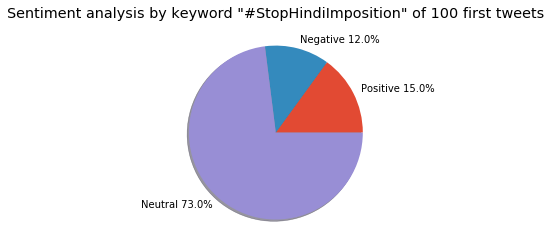

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment
0,What mother language Tadipar Divide Rule There...,144,mjattupuram1,2019-09-14 11:58:38,Twitter for Android,"Mangalore, India",199,3,0.0
1,against Hindi language Impose Hindi Tamil Lang...,140,Srinivfc7_,2019-09-14 11:58:37,Twitter for Android,India,140,14,0.0
2,Hindia from Madras speak Madrasi,108,binnu024,2019-09-14 11:58:37,Twitter for iPhone,"Sholinganallur, India",55,218,0.0
3,need those different languages passports tell ...,140,KishorGavdaKK,2019-09-14 11:58:37,Twitter for Android,ಕನ್ನಡನಾಡು,1252,18,0.0
4,Hindi national language work marketing promot...,140,Srinivfc7_,2019-09-14 11:58:36,Twitter for Android,India,140,42,0.0


In [167]:
# Extracting tweets by a key word
extractor = twitter_setup()
tweets = extractor.search(q=hashtag, count=500, lang='en')

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Creating a DataFrame with extracted tweets
tweet_text=[]
for tweet in tweets[:]:
    text=TextBlob(tweet.text)
    tweet_text.append(tweet.text)
data_on_new_hashtag={'Tweet': tweet_text}
df=pd.DataFrame(data_on_new_hashtag)

# Tweets cleaning

clean_tweets=[]
for tweet in df.Tweet :
    tweet=re.sub(r'@[A-Za-z0-9]+','',tweet) # Remove @username
    tweet=re.sub('https?://[A-Za-z0-9./]+','', tweet) # Remove https links
    tweet = re.sub(r'\b\w{1,3}\b', '', tweet) # Remove small words
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')  # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = re.sub(r'\&\w*;', '', tweet) # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub('[!@$:]', '', tweet) # Remove some special characters
    tweet = tweet.lstrip(' ') # Removing the blank space at the beginning
    tweet = re.sub(r'#\w*', '', tweet) # Remove hashtags
    tweet=re.sub('[^A-Za-z0-9]+', ' ', tweet)
    clean_tweets.append(tweet)
    
# Sentiment analysis on cleaned tweets

neutral=0
positive=0
negative=0
polarity=[]
posit_text=[]
neg_text=[]
neutral_text=[]

for tweet in clean_tweets:
    text=TextBlob(tweet)
    polarity.append(text.sentiment.polarity)

# Assigning all values to three categories: positive, negative and neutral sentiment

    if text.sentiment.polarity < 0:
        negative +=1 
        neg_text.append(clean_tweets)
         # The + operation adds the array elements to the original array.
    elif text.sentiment.polarity > 0:
        positive += 1
        posit_text.append(clean_tweets)
    else: neutral += 1
        
# Calculating the percentage of positive, negative and neutral sentiment

neutral_percent=round(neutral/len(polarity)*100,2)
positive_percent=round(positive/len(polarity)*100,2)
negative_percent=round(negative/len(polarity)*100,2)

# Plotting a pie chart
labels='Positive '+str(positive_percent)+'%', 'Negative '+str(negative_percent)+'%', 'Neutral '+str(neutral_percent)+'%'
sizes=[positive_percent, negative_percent, neutral_percent]
plt.title('Sentiment analysis by keyword "'+str(hashtag)+'" of '+str(len(polarity))+' first tweets')
plt.pie(sizes, labels=labels, shadow=True)

plt.show()

# Creating DataFrame (updating the previous one) with cleaned tweets and addtional interesting information on them 

df['Tweet']=clean_tweets
df['len']=np.array([len(tweet.text) for tweet in tweets])
df['user_name']= np.array([tweet.user._json['screen_name'] for tweet in tweets])
df['date']=np.array([tweet.created_at for tweet in tweets])
df['source']=np.array([tweet.source for tweet in tweets])
#df['likes']=np.array([tweet.favorite_count for tweet in tweets])
df['location']=np.array([tweet.user._json['location'] for tweet in tweets])
#df['user_id']=np.array([tweet.id for tweet in tweets])
df['number of followers']=np.array([tweet.user._json['followers_count'] for tweet in tweets])
df['retweets']=np.array([tweet.retweet_count for tweet in tweets])
df['Sentiment']=polarity

df.head()

In [168]:
df['calculated_field']=df.Sentiment*df['number of followers']*df.retweets

In [169]:
df.nsmallest(10, 'calculated_field').sort_values(by='Sentiment', ascending=True)

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment,calculated_field
28,hate Hindi hate Imposition Some other languag...,140,sundarvel98,2019-09-14 11:58:26,Twitter for Android,"Salem, India",1694,262,-0.575000,-255201.100000
97,hate Hindi hate Imposition Some other languag...,140,adhirairamesh2,2019-09-14 11:57:43,Twitter for Android,,510,262,-0.575000,-76831.500000
58,hate Hindi hate Imposition Some other languag...,140,Srinivfc7_,2019-09-14 11:58:06,Twitter for Android,India,140,558,-0.575000,-44919.000000
64,hate Hindi hate Imposition Some other languag...,140,Inzamam2205,2019-09-14 11:58:04,Twitter for Android,Birthplace of TAMIL,37,262,-0.575000,-5574.050000
31,Fuck this have mothers tongues speak yours hom...,140,ace09prakash,2019-09-14 11:58:24,Twitter for Android,Dravidian,3732,4,-0.400000,-5971.200000
86,Tamilians desperately need learn some language...,140,Abuhani77854984,2019-09-14 11:57:53,Twitter for Android,,14,322,-0.241667,-1089.433333
99,dont Employment exams language Union govt serv...,140,TSher_M,2019-09-14 11:57:42,Twitter for Android,,193,67,-0.200000,-2586.200000
66,impose Hindi will destroy totally hindian states,140,Marivjoffl,2019-09-14 11:58:04,Twitter for Android,"Coimbatore, India",441,29,-0.100000,-1278.900000
84,Jokes apart think utter remarks language just ...,140,Ben64120167,2019-09-14 11:57:54,Twitter for Android,,164,247,-0.050000,-2025.400000
13,happening long,140,Marivjoffl,2019-09-14 11:58:32,Twitter for Android,"Coimbatore, India",441,78,-0.050000,-1719.900000


In [170]:
df.nlargest(10, 'calculated_field').sort_values(by='Sentiment', ascending=False)

,Tweet,len,user_name,date,source,location,number of followers,retweets,Sentiment,calculated_field
60,ranjith proud indian hindian,140,Inzamam2205,2019-09-14 11:58:06,Twitter for Android,Birthplace of TAMIL,37,159,0.800000,4706.40
18,While India celebrating Hindi divas Reaction ...,140,NitniTamiL,2019-09-14 11:58:30,Twitter Web App,Chennai - India,353,10,0.800000,2824.00
40,ranjith proud indian hindian,140,Abuhani77854984,2019-09-14 11:58:20,Twitter for Android,,14,159,0.800000,1780.80
69,Because Proud Tamilians,86,Rovin53984569,2019-09-14 11:58:02,Twitter for Android,India,132,1,0.800000,105.60
45,There nothing like nation Beauty India unity d...,140,Srinivfc7_,2019-09-14 11:58:14,Twitter for Android,India,140,64,0.500000,4480.00
76,matatta stop paying taxes that used promote H...,140,Srinivfc7_,2019-09-14 11:58:00,Twitter for Android,India,140,63,0.357143,3150.00
63,theindian India diverse country with more tha...,140,adhirairamesh2,2019-09-14 11:58:04,Twitter for Android,,510,584,0.250000,74460.00
49,Khan market really need check trend have been,140,IMA_Indian,2019-09-14 11:58:12,Twitter for iPhone,India & GCC,1920,309,0.200000,118656.00
96,your world first language Tamil World Last la...,140,Marivjoffl,2019-09-14 11:57:44,Twitter for Android,"Coimbatore, India",441,130,0.125000,7166.25
30,jesu long live Tamil World language TAMIL Tam...,140,adhirairamesh2,2019-09-14 11:58:25,Twitter for Android,,510,407,0.043182,8963.25


In [171]:
#Total sum of calculated_field values - shows if the trend is positive or negative
round(df.calculated_field.sum(),2)

-170913.73

In [172]:
import nltk
import itertools
from collections import Counter

In [173]:
import itertools
merged = list(itertools.chain.from_iterable(tokenized_tweets))

In [174]:
#Tokenization (splitting text into a list of words) 
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
 
tokenized_tweets=[]
for tweet in clean_tweets:
    tokenized_tweets.append(tweet_tokenizer.tokenize(tweet))
    
merged = list(itertools.chain.from_iterable(tokenized_tweets))
top_most_common_words=Counter(merged).most_common(10)
top_most_common_words
#df3=pd.DataFrame(top_most_common_words, columns= ['Total','freq' ])


[('language', 53),
 ('hindi', 38),
 ('this', 21),
 ('tamil', 18),
 ('india', 15),
 ('will', 15),
 ('that', 10),
 ('have', 10),
 ('with', 9),
 ('from', 8)]

In [175]:
# potivite tweets and negative tweets
p=df.Tweet.where(df.Sentiment > 0)
p.dropna(inplace=True)
n=df.Tweet.where(df.Sentiment < 0)
n.dropna(inplace=True)

In [176]:
#tokenization of positive and negative tweets
tokenized_tweets_p=[]
for tweet in list(p):
    tokenized_tweets_p.append(tweet_tokenizer.tokenize(tweet))
top_10_positive_words=Counter(list(itertools.chain.from_iterable(tokenized_tweets_p))).most_common(15)

tokenized_tweets_n=[]
for tweet in list(n):
    tokenized_tweets_n.append(tweet_tokenizer.tokenize(tweet))
top_10_negative_words=Counter(list(itertools.chain.from_iterable(tokenized_tweets_n))).most_common(15)


In [177]:
df1=pd.DataFrame(top_10_positive_words, columns= ['Positive','freq_p' ])
df2=pd.DataFrame(top_10_negative_words, columns= ['Negative','freq_n' ])
df_merged = df1.merge(df2, how='outer', left_index=True, right_index=True)
df_merged

,Positive,freq_p,Negative,freq_n
0,hindi,4,language,10
1,tamil,4,hate,8
2,language,4,hindi,5
3,have,4,some,5
4,indian,3,other,5
5,india,3,imposition,4
6,world,3,against,4
7,that,3,wishes,4
8,proud,3,need,2
9,tamilnadu,2,fuck,2


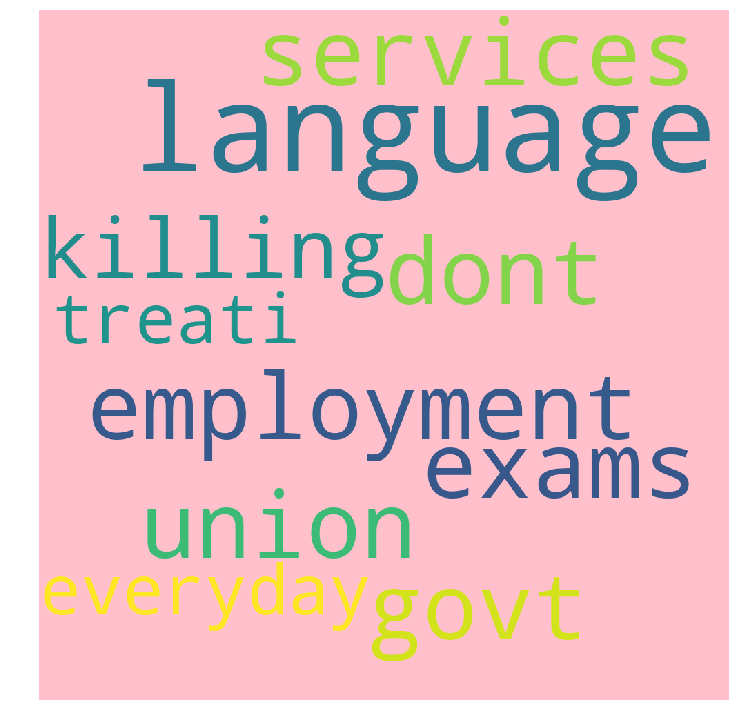

In [178]:
comment_words = ' ' #We will be appending the words to this var
stopwords = set(STOPWORDS) #Finds all stop words in the set of tweets.
for val in df.Tweet:
   val = str(val) #convert all tweet content into strings
   tokens = val.split() #Split all strings into individual components
   for i in range(len(tokens)):
      tokens[i] = tokens[i].lower() #Converts all the individual strings to lower case.
for words in tokens:
   comment_words = comment_words + words + ' '
wordcloud=WordCloud(width=1000,height=1000, background_color='pink', stopwords=stopwords,min_font_size=6).generate(comment_words)
#All of this is a single line
plt.style.use('ggplot')
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [179]:
df.date.max()-df.date.min()

Timedelta('0 days 00:00:56')